<a href="https://colab.research.google.com/github/BaxLi/AI-Crane/blob/main/AI_Crane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import os
# очистка ОЗУ
import gc 

In [ ]:
import shutil
shutil.copytree('/content/drive/MyDrive/AI-University/sample_data/Crane/Dataset', '/content/yolo8_dataset')

'/content/yolo8_dataset'

In [ ]:
datasetPath='/content/yolo8_dataset/v01'
datasetYAMLFile=os.path.join(datasetPath, 'data_custom.yaml')

## Загрузка REPO

In [ ]:
# Скачиваем репозиторию и её зависимости
!pip install ultralytics -qU
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.41 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.7/78.2 GB disk)


## Обучаем нейросеть

In [ ]:
gc.collect()

55339

In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
# model = YOLO("/content/runs/detect/yolov8n_v8_TEST2/weights/best.pt")  # load a custom model
model = YOLO("/content/runs/detect/yolov8n_v8_TEST2/weights/last.pt")  # load a custom model

In [ ]:
results = model.train(data=datasetYAMLFile, imgsz=640, epochs=100, batch=32, name='yolov8n_v8_TEST')  # Обучаем модель

Ultralytics YOLOv8.0.41 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/yolo8_dataset/v01/data_custom.yaml, epochs=100, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v8_TEST, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

## Предиктим 

In [ ]:
image=os.path.join(datasetPath,'val/images/25.jpg')

In [ ]:
# Выполняем код детекции
res = model(image)  #Предиктим

Ultralytics YOLOv8.0.41 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/yolo8_dataset/v01/val/images/25.jpg: 640x640 1 formwork, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
print(res[0].boxes.boxes)

tensor([[357.00000,  94.00000, 437.00000, 351.00000,   0.78930,   2.00000]], device='cuda:0')


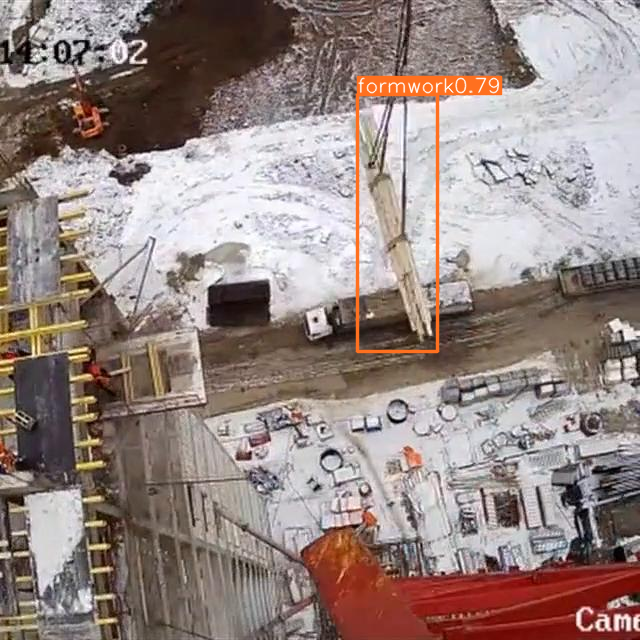

In [ ]:
from google.colab.patches import cv2_imshow
res_plotted = res[0].visualize()
cv2_imshow(res_plotted)

## Выводим разметку на изображении

In [ ]:
import PIL

# Функция, которая отображает предсказания YOLO-модели
# На вход нужно подать путь к изображению, и аутпут нейронной сети
# П.С. - если вы работаете не в колабе, можно вывести результат, указав аргумент show=True в model.predict()
colors_list = ["red", "green", "blue"]
def show_predict(image_path, result):
    result = result[0].boxes.data
    image = PIL.Image.open(image_path)
    draw_image = PIL.ImageDraw.Draw(image)
    for i in range(result.shape[0]):
        class_index = int(result[i, -1].detach().item())
        draw_image.rectangle(result[i, :4].detach().numpy(), outline=colors_list[class_index], width=5)
    return image

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt') #Не забудьте указать правильный путь к нужному эксперименту